In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv("../data/cookie_cats.csv")

In [3]:
data

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [4]:
# Grupları ayırma (gate_30 vs gate_40)
group_30 = data[data["version"] == "gate_30"]
group_40 = data[data["version"] == "gate_40"]

In [5]:
print("Group sizes:", len(group_30), len(group_40))

Group sizes: 44700 45489


In [8]:
# Ortalama retention değerleri

ret1_30 = group_30["retention_1"].mean()
ret1_40 = group_40["retention_1"].mean()

ret7_30 = group_30["retention_7"].mean()
ret7_40 = group_40["retention_7"].mean()

In [9]:
print("Retention 1d - gate_30:", ret1_30, "gate_40:", ret1_40)
print("Retention 7d - gate_30:", ret7_30, "gate_40:", ret7_40)

Retention 1d - gate_30: 0.4481879194630872 gate_40: 0.44228274967574577
Retention 7d - gate_30: 0.19020134228187918 gate_40: 0.18200004396667327


### İstatistiksel Test

#### t-test

In [12]:
tstat_1, pval_1 = stats.ttest_ind(group_30["retention_1"], group_40["retention_1"])
tstat_7, pval_7 = stats.ttest_ind(group_30["retention_7"], group_40["retention_7"])

In [13]:
print("Day1 retention t-test p-value:", pval_1)
print("Day7 retention t-test p-value:", pval_7)

Day1 retention t-test p-value: 0.07441111525563184
Day7 retention t-test p-value: 0.0015540151201088365


#### Görselleştirme

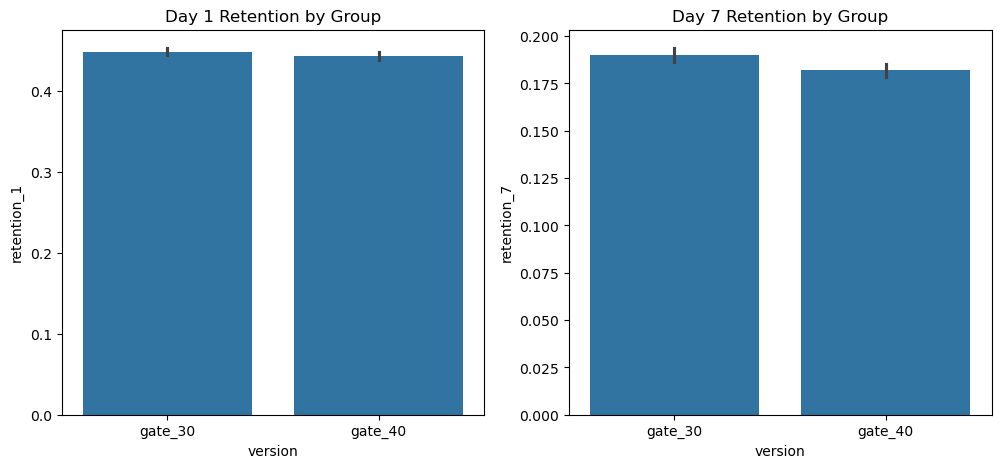

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.barplot(x="version", y="retention_1", data=data, errorbar=('ci', 95), ax=ax[0])
ax[0].set_title("Day 1 Retention by Group")

sns.barplot(x="version", y="retention_7", data=data, errorbar=('ci', 95), ax=ax[1])
ax[1].set_title("Day 7 Retention by Group")

plt.show()

In [25]:
if pval_1 < 0.05:
    print("1. gün retention farkı istatistiksel olarak anlamlıdır.")
else:
    print("1. gün retention farkı istatistiksel olarak anlamlı değildir.")

1. gün retention farkı istatistiksel olarak anlamlı değildir.


In [26]:
if pval_7 < 0.05:
    print("7. gün retention farkı istatistiksel olarak anlamlıdır.")
else:
    print("7. gün retention farkı istatistiksel olarak anlamlı değildir.")

7. gün retention farkı istatistiksel olarak anlamlıdır.
